In [1]:
import numpy as np
from ATDetector import ATDetector
import cv2
from time import sleep
from IPython.display import clear_output
%matplotlib inline

# AprilTags

AprilTags are fiducial markers that can be used for localization and camera calibration. We will use them for localization, they give us an estimate of where the car is on the track. 
<img src="Images/tag_corners.png" width="250" height="250" />
For correct use, you have to make sure the corners are aligned correctly, based on the orientation above. An easy way to check this is to run the **visualize_image_detections** function and check that both colored corners are on the bottom.
There are many families of AprilTags, each with different looks and use cases. For our purposes, use either the tagStandard41h12 or tagStandard52h13 families.
You will also need to supply the tag size. This is measured on only from the insides of the tag, in meters.

# Fisheye Cameras

Fisheye, or wide-angle, cameras capture a larger Field of View than pinhole camera, but they distort lines to curves around the edges of the image. To use apriltags, we need to un-distort the image before running detections. 
<img src="Images/fisheyebeforeafter.png"  />
After running the fisheye camera calibration script, you will get an intrinsic matrix (K) and an array of distortion coefficents (D). Passing these into the undistort function will return an image ready for detection.
<img src="Images/tag_measuring.png"  />

# Pose Estimation

Our goal is to get the location of the camera in the world frame, from the pixel location of the tag in the camera. There are a few intermediate steps to get from one location to another.
### Pixel Frame to Tag Frame
Here is where the apriltags do their job, outputting a translation vector *I* and a rotation matrix *R* of where the tag is located, relative to the camera. 


### Tag Frame to World Frame
Here we have to use our knowledge about the world. We need to supply the tag locations and orientations in the world frame to the detector. Then, we can combine the two translations and rotations to compute the total location.

In [2]:
#Scale Factor for Showing Images
SCALE=.3
#Information about the Camera
camera = {}
#Camera Intrinsic Matrix (3x3)
camera["K"] = np.array(
    [[631.6058624841243, 0.0, 673.9002987027918], [0.0, 627.4303222760955, 380.85431690312384], [0.0, 0.0, 1.0]])
#Fisheye Camera Distortion Matrix
camera["D"] = np.array(
    [[-0.031080677599846774], [-0.006061559072085696], [-0.0011641369792770276], [0.00028577486827623653]])
camera["fisheye"] = True
camera["flipped"] = True
#Rotation Matrix from World to Camera Frame if Camera is Flipped
camera["flip_correction"]=np.array([[-1.,0.,0.],[0.,-1.,0.],[0.,0.,1.]])
camera["res"] = (1280, 760)
#fx,fy,cx,cy from K
camera["params"] = [631.605, 627.43, 673.9, 380.85]
#Information about the Tags
tags = {}
#To add more families, seperate with a space instead of using a list
families = "tagStandard52h13"
#Size of Tag in Meters
tag_size = .04


In [41]:
#Create Detector
detect=ATDetector(families,tag_size,camera)

In [ ]:
fname="Images/test2.jpg"
#Estimate Camera Pose relative to Tag
detect.estimate_image_pose(fname)


Tag 4 estimates the camera at:
X:-0.01065201603161434
Y:-0.043365537117933416
Z:0.7491165314355398


In [ ]:
#Overlay detections on the Image
detect.visualize_image_detections(fname)

In [4]:
fname="Videos/x_only.h264"
#Get Locations for each frame
poses=detect.estimate_video_pose(fname,show_animation=False)

[[ 0.          0.09467471  0.09927352  0.10410296  0.10836145  0.11145226
   0.1149608   0.11811423  0.12172343  0.12536303  0.12881966  0.13360247
   0.13865373  0.14293123  0.14585787  0.14921133  0.15396078  0.15822684
   0.16122373  0.16385009  0.16724478  0.17081281  0.17473809  0.17845801
   0.18235495  0.18629932  0.18925872  0.19206675  0.19545718  0.1985841
   0.2007238   0.20347407  0.20689831  0.2091264   0.21155047  0.21399948
   0.2180744   0.22320673  0.2272009   0.23147688  0.23532388  0.23801776
   0.24275854  0.24694415  0.25025176  0.2532515   0.25633248  0.25962538
   0.26294321  0.26685555  0.27018846  0.27366455  0.27726649  0.28304721
   0.28776663  0.29286493  0.29719884  0.30089882  0.30615426  0.3079648
   0.31125452  0.3139497   0.31915396  0.3203445   0.32216909  0.32515104
   0.32700351  0.32816205  0.3294371   0.33277614  0.33250546  0.33287821
   0.33495465  0.33361401  0.33518098  0.33619858  0.33629695  0.33673732
   0.33758236  0.33802918  0.33788673  0

In [ ]:
#Overlay detections on the Video
detect.visualize_video_detections(fname)

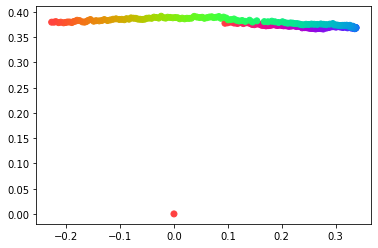

In [40]:
plt.figure()
#Create Color Wheel
phi = np.linspace(0, 2*np.pi, poses.shape[1])
x = np.sin(phi)
y = np.cos(phi)
rgb_cycle = np.vstack((           
    .5*(1.+np.cos(phi)), 
    .5*(1.+np.cos(phi+2*np.pi/3)), 
    .5*(1.+np.cos(phi-2*np.pi/3)))).T 
#Animation Loop
for i in range(poses.shape[1]):
    plt.scatter(poses[0,:i],poses[2,:i],c=rgb_cycle[:i])
    plt.show()
    sleep(0.1)
    clear_output(wait=True)